In [25]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import utils
from analysis import ModelAnalysis
from sklearn.metrics import (d2_absolute_error_score, max_error,
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score)
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(42)


In [26]:
# define models

models = {}
models['forest_default'] = RandomForestRegressor(random_state=42)
for ne in [30, 70,100,120]:
    for md in [18, 20,22,24]:
        for mss in [2, 3, 4]:
            models[f'forest_ne_{ne}_md_{md}_ms_{mss}'] = RandomForestRegressor(
                random_state=42,
                n_estimators=ne,
                max_depth=md,
                min_samples_split=mss
            )

# best
# best_tree = DecisionTreeRegressor(
#     random_state=42,
#     max_depth=18,
#     min_samples_leaf=4
# )
# ma = ModelAnalysis(models={
#     'tree_default': tree_default,
#     'tree_default_ms_4': tree_default_ms_4,
#     # 'tree_md_14': tree_md_14,
#     # 'tree_md_16': tree_md_16,
#     # 'tree_md_18': tree_md_18,
#     # 'tree_md_18_ms_4': tree_md_18_ms_4,
#     # 'tree_md_20': tree_md_20,
#     # 'tree_md_22': tree_md_22,
# })
best_model = {
    'default_forest': RandomForestRegressor(random_state=42),
    'forest_ne_30_md_18_ms_2': RandomForestRegressor(
        random_state=42,
        n_estimators=30,
        max_depth=18,
        min_samples_split=2
    )
}
ma = ModelAnalysis(models=models)


In [27]:
ma.train(track_emissions=False)
_ = ma.predict(split='train')
_ = ma.predict(split='val')
_ = ma.predict(split='test')

Fitting forest_default
Fitting forest_ne_30_md_18_ms_2
Fitting forest_ne_30_md_18_ms_3
Fitting forest_ne_30_md_18_ms_4
Fitting forest_ne_30_md_20_ms_2
Fitting forest_ne_30_md_20_ms_3
Fitting forest_ne_30_md_20_ms_4
Fitting forest_ne_30_md_22_ms_2
Fitting forest_ne_30_md_22_ms_3
Fitting forest_ne_30_md_22_ms_4
Fitting forest_ne_30_md_24_ms_2
Fitting forest_ne_30_md_24_ms_3
Fitting forest_ne_30_md_24_ms_4
Fitting forest_ne_70_md_18_ms_2
Fitting forest_ne_70_md_18_ms_3
Fitting forest_ne_70_md_18_ms_4
Fitting forest_ne_70_md_20_ms_2
Fitting forest_ne_70_md_20_ms_3
Fitting forest_ne_70_md_20_ms_4
Fitting forest_ne_70_md_22_ms_2
Fitting forest_ne_70_md_22_ms_3
Fitting forest_ne_70_md_22_ms_4
Fitting forest_ne_70_md_24_ms_2
Fitting forest_ne_70_md_24_ms_3
Fitting forest_ne_70_md_24_ms_4
Fitting forest_ne_100_md_18_ms_2
Fitting forest_ne_100_md_18_ms_3
Fitting forest_ne_100_md_18_ms_4
Fitting forest_ne_100_md_20_ms_2
Fitting forest_ne_100_md_20_ms_3
Fitting forest_ne_100_md_20_ms_4
Fitting for

/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:162: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:166: UserWarning: 
The palette list has fewer values (10) than needed (49) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:162: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:166: UserWarning: 
The palette list has fewer values (10) than needed (49) and will cycle, which ma

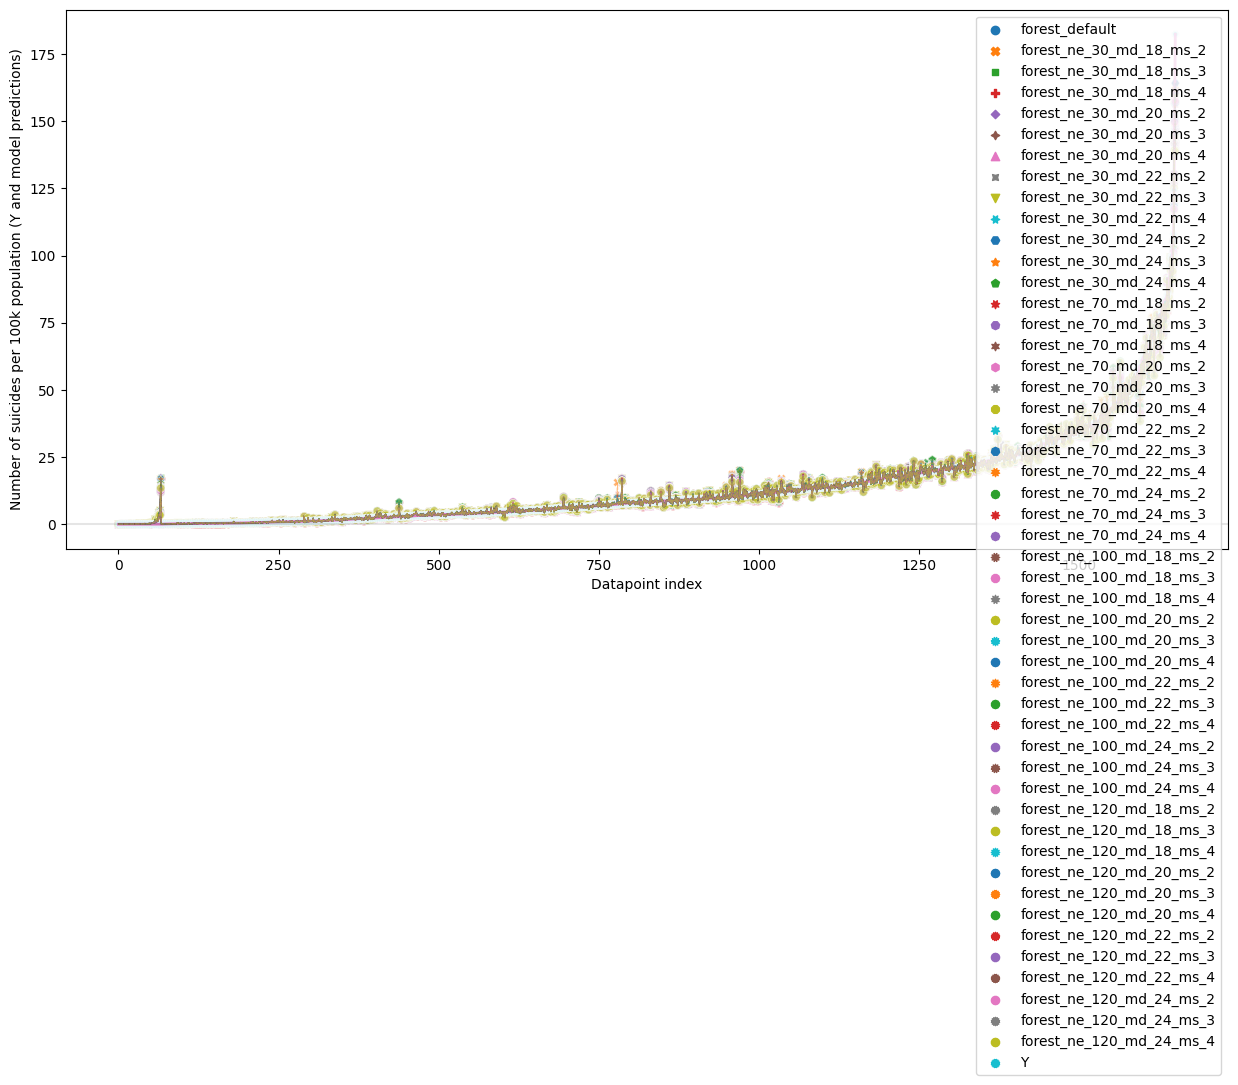

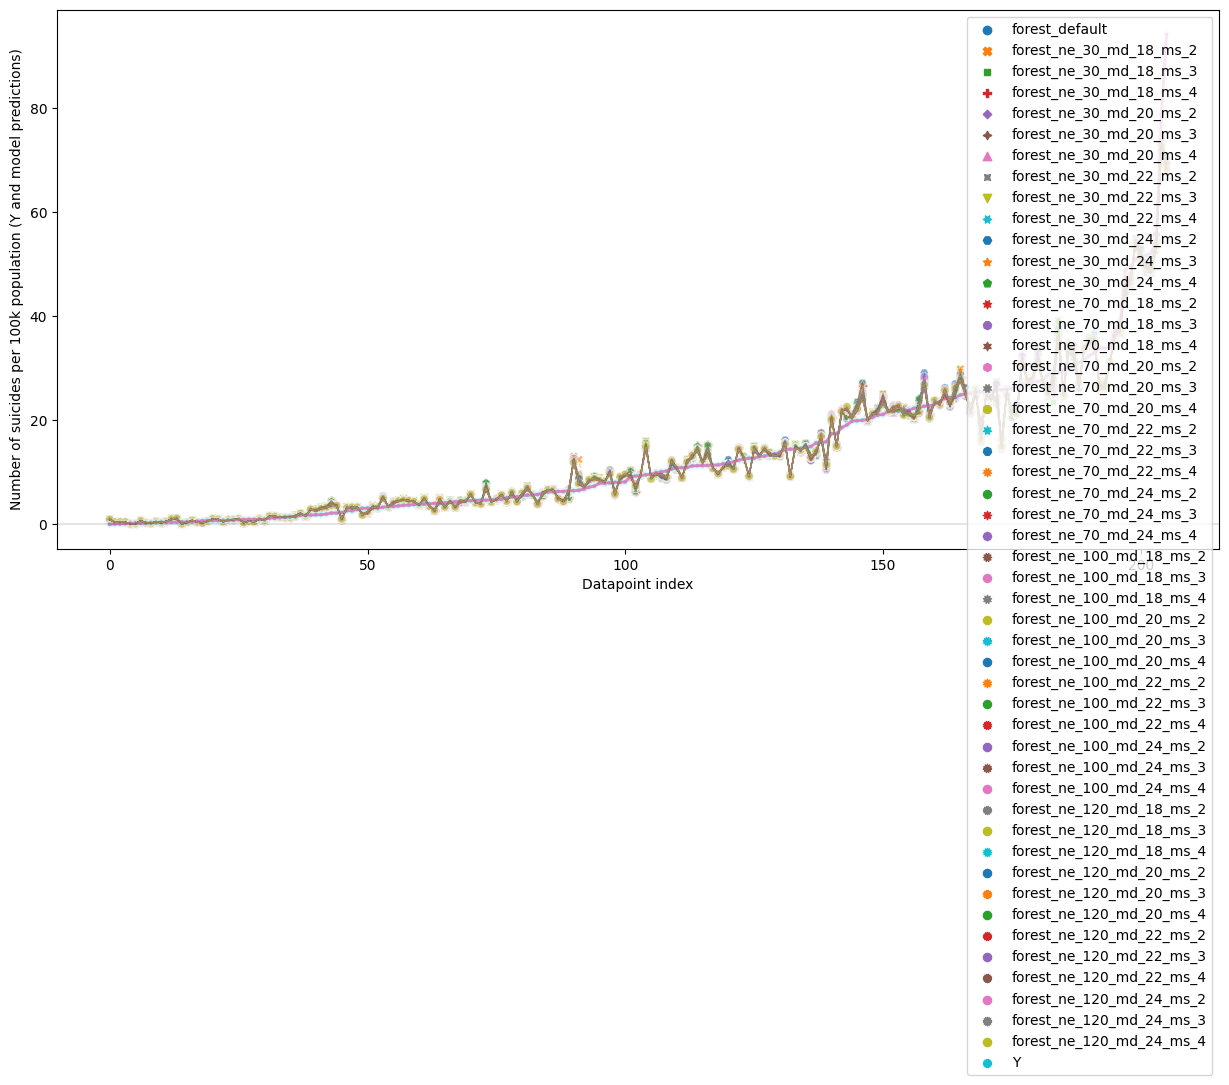

In [28]:
ma.visualize_predictions(split='train', sample_range=(0,2_000))
ma.visualize_predictions(split='val')

mean_squared_error
min: forest_ne_100_md_22_ms_2
                       model     score
0             forest_default  2.304102
1    forest_ne_30_md_18_ms_2  2.528616
2    forest_ne_30_md_18_ms_3  3.712242
3    forest_ne_30_md_18_ms_4  4.258385
4    forest_ne_30_md_20_ms_2  2.404160
5    forest_ne_30_md_20_ms_3  3.435805
6    forest_ne_30_md_20_ms_4  4.196338
7    forest_ne_30_md_22_ms_2  2.379460
8    forest_ne_30_md_22_ms_3  3.442642
9    forest_ne_30_md_22_ms_4  4.235862
10   forest_ne_30_md_24_ms_2  2.452211
11   forest_ne_30_md_24_ms_3  3.465776
12   forest_ne_30_md_24_ms_4  4.228805
13   forest_ne_70_md_18_ms_2  2.600311
14   forest_ne_70_md_18_ms_3  3.582973
15   forest_ne_70_md_18_ms_4  4.420621
16   forest_ne_70_md_20_ms_2  2.465926
17   forest_ne_70_md_20_ms_3  3.451429
18   forest_ne_70_md_20_ms_4  4.384425
19   forest_ne_70_md_22_ms_2  2.423618
20   forest_ne_70_md_22_ms_3  3.432273
21   forest_ne_70_md_22_ms_4  4.384005
22   forest_ne_70_md_24_ms_2  2.452075
23   forest_ne_

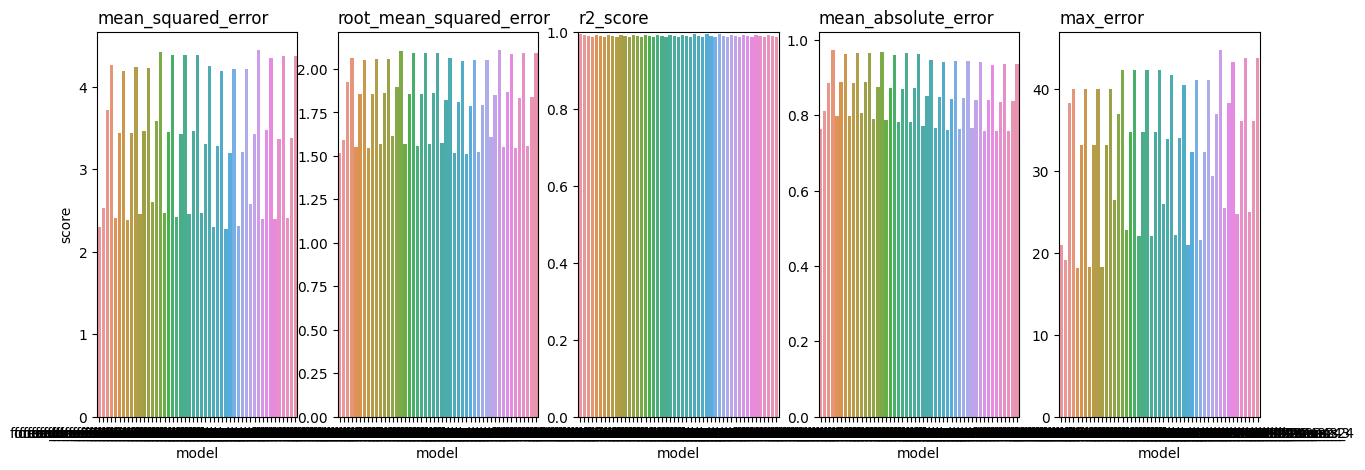

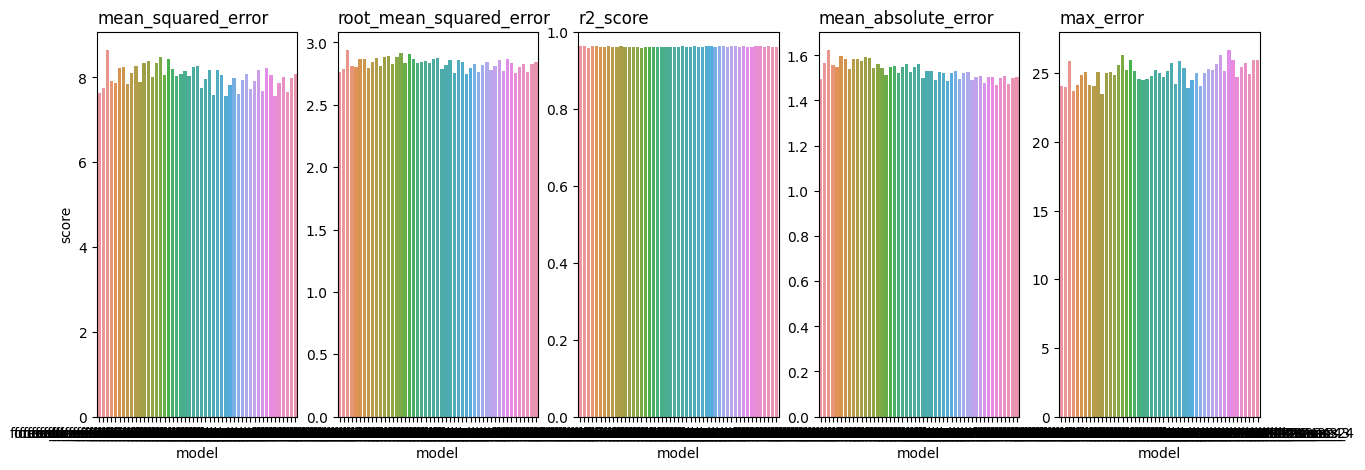

In [29]:
df = ma.visualize_metrics(split='train', verbose=True)

print(f"VAL")
df = ma.visualize_metrics(split='val', verbose=True)
# df = ma.visualize_metrics(split='train')

In [31]:
# save models
# ma.models = {'forest_ne_100_md_22_ms_2': ma.models['forest_ne_100_md_22_ms_2']}
# ma.save_models(base_path="models/forest")